In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Image
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [90]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [91]:
null_values = df.isnull().sum()
print(null_values)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [92]:
mask = df['Spending Score (1-100)'] >50
df_score = df[mask]
df_score.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72


In [93]:
df_score.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,97.000000,97.000000,97.000000,97.000000
mean,100.298969,34.597938,60.412371,71.670103
std,59.122783,13.024544,26.756133,14.710910
min,2.000000,18.000000,15.000000,51.000000
25%,51.000000,26.000000,42.000000,57.000000
50%,96.000000,31.000000,60.000000,73.000000
75%,152.000000,38.000000,78.000000,85.000000
max,200.000000,70.000000,137.000000,99.000000


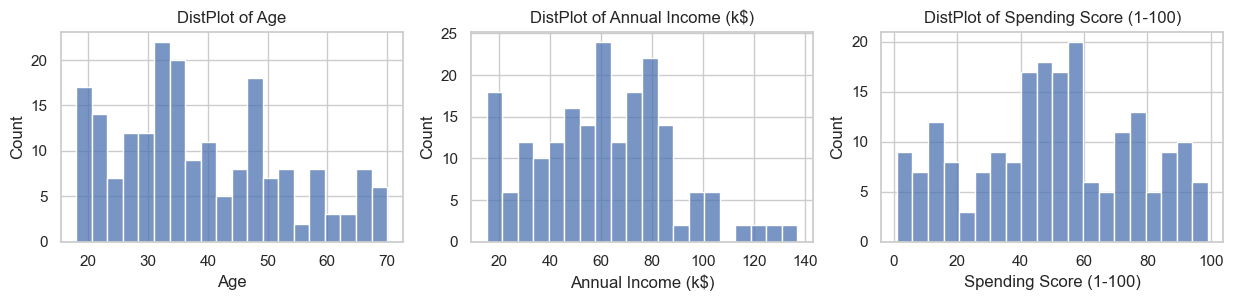

In [94]:
plt.figure(figsize = (15,6))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n += 1
    plt.subplot(2,3,n)
    plt.subplots_adjust(hspace=0.2,wspace = 0.2)
    sns.histplot(df[x],bins = 20)
    plt.title('DistPlot of {}'.format(x))
plt.show();

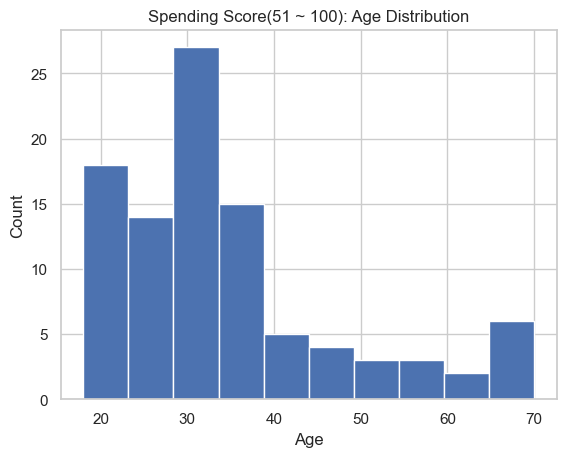

In [95]:
df_score['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Spending Score(51 ~ 100): Age Distribution');

In [96]:
#looking to the histogram many of people who have spending score greater than 50 are younger

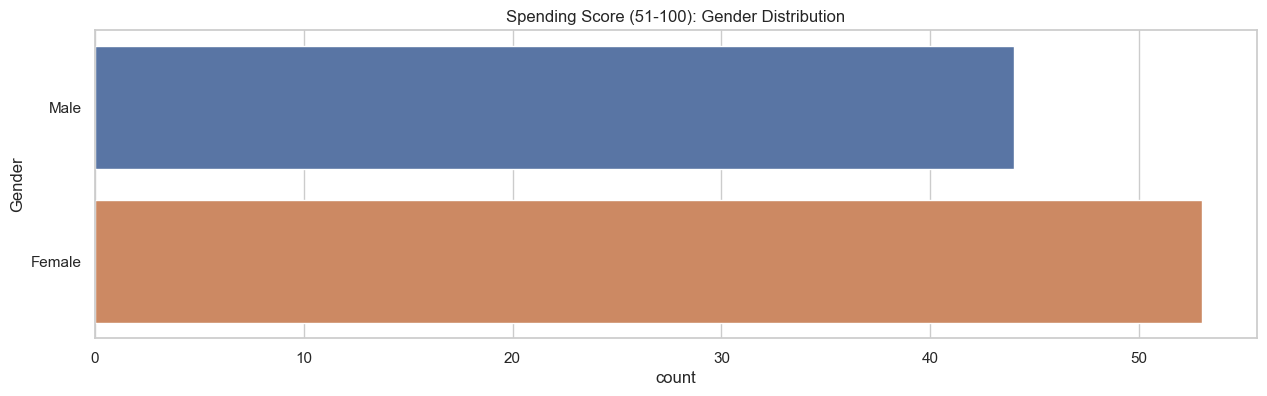

In [97]:
plt.figure(figsize = (15,4))
sns.countplot(y='Gender',data = df_score)
plt.title('Spending Score (51-100): Gender Distribution')
plt.show();

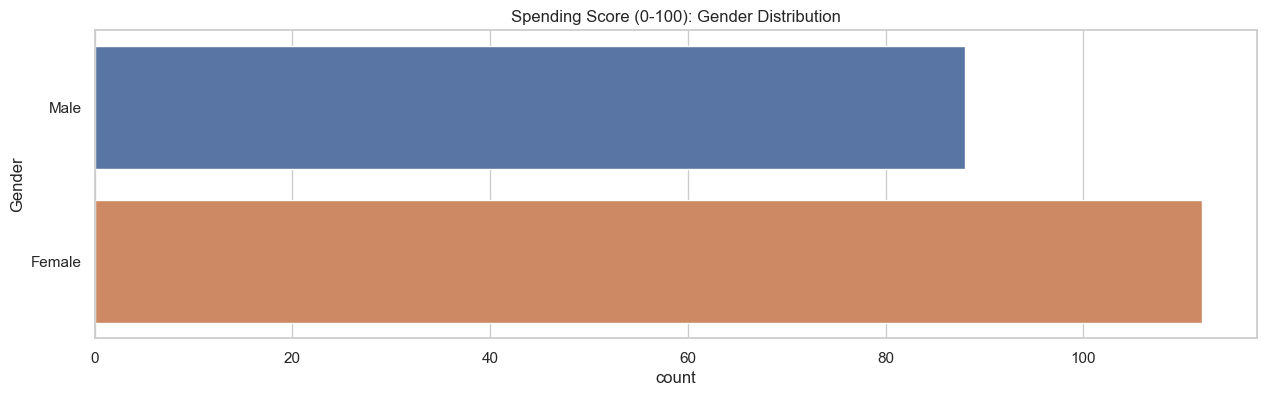

In [98]:
plt.figure(figsize = (15,4))
sns.countplot(y='Gender',data = df)
plt.title('Spending Score (0-100): Gender Distribution')
plt.show();

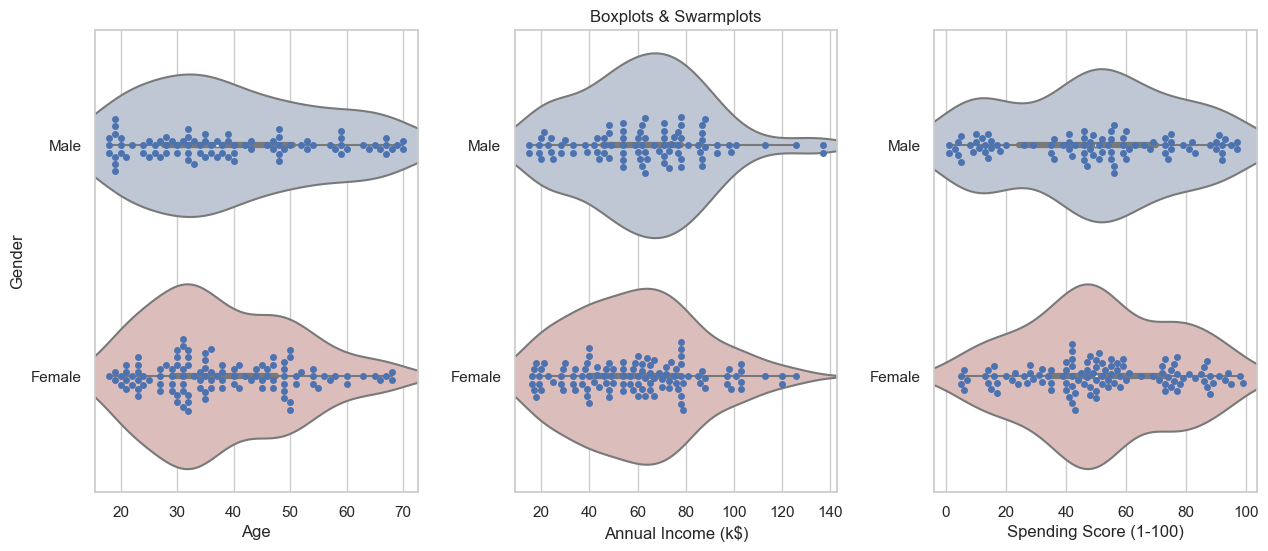

In [99]:
plt.figure(1,figsize = (15,6))
n = 0
for cols in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace = 0.3,wspace = 0.3)
    sns.violinplot(x = cols,y = 'Gender',data = df,palette = 'vlag')
    sns.swarmplot(x = cols,y = 'Gender',data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show();

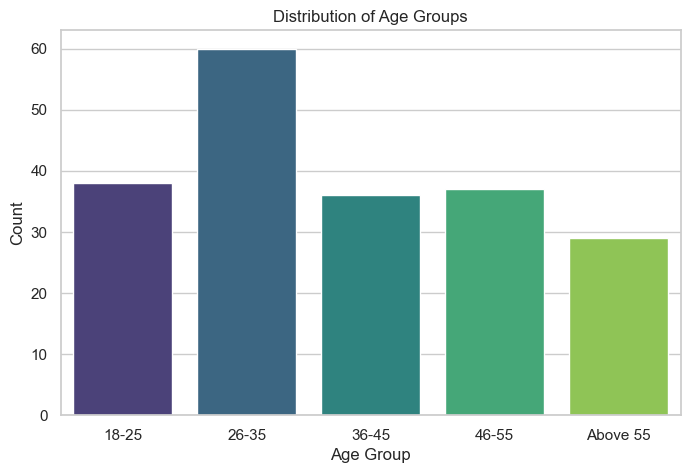

In [100]:


# Categorizing age groups
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
above_55 = df.Age[df.Age > 55]

# Counting occurrences in each age group
age_counts = [len(age_18_25), len(age_26_35), len(age_36_45), len(age_46_55), len(above_55)]
age_labels = ['18-25', '26-35', '36-45', '46-55', 'Above 55']

# Creating bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=age_labels, y=age_counts, palette='viridis')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups')
plt.show()


In [101]:
#rel between annual income and spending score

E:\annoconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


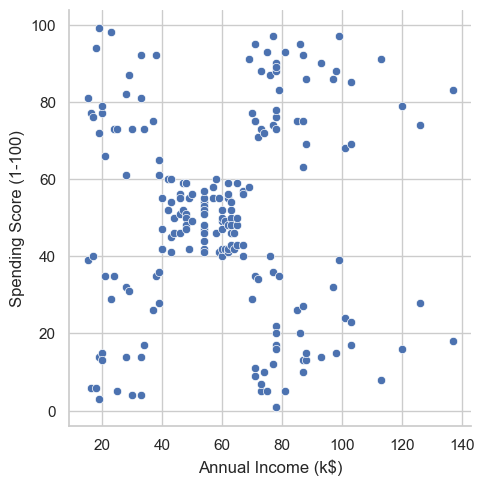

In [102]:
sns.relplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)

In [103]:
X = df.iloc[:,[2,4]]
print(f"X Shape {X.shape}")
X.head()

X Shape (200, 2)


,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [104]:
# Clustering using K-Means

# Iterate

# Use a for loop to build and train a K-Means model where n_clusters ranges from 2 to 12 (inclusive). Each time a model is trained, calculate the inertia and add it to the list inertia_errors, then calculate the silhouette score and add it to the list silhouette_scores.

# Segmentation using Age & Spending Score

In [105]:
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []
#Add a for loop to train model and calculate inertia,silhouette score.
for k in n_clusters:
    model = KMeans(n_clusters = k,random_state=42,n_init=10)
    #Train Model
    model.fit(X)
    #Calculate Inertia
    inertia_errors.append(model.inertia_)
    #Calculate Silhouette Score
    silhouette_scores.append(silhouette_score(X,model.labels_))
print("Inertia:",inertia_errors[:3])
print()
print("Silhouette Scores:",silhouette_scores[:3])

E:\annoconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\annoconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\annoconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\annoconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

Inertia: [75949.15601023019, 45840.67661610867, 28165.58356662934]

Silhouette Scores: [0.4692341232501655, 0.45300127016521263, 0.49973941540141753]


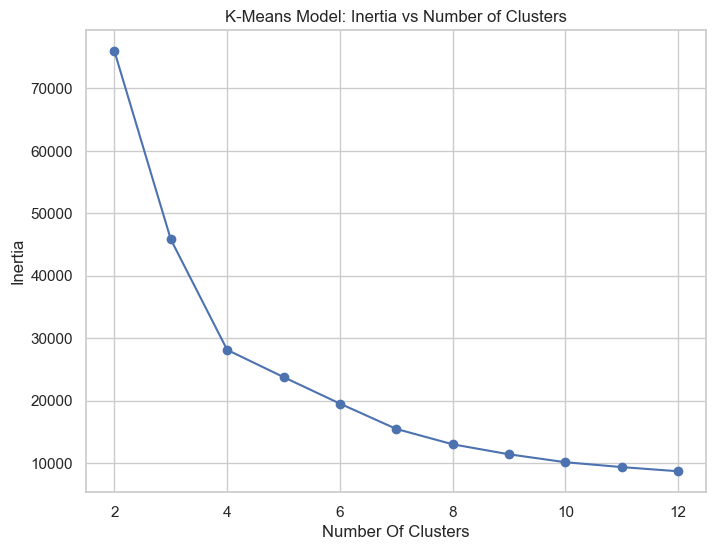

In [106]:
#Elbow graph
#Create a line plot of inertia_errors vs n_clusters
x_values = list(range(2, 13)) 

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Set Seaborn style

# Create a line plot using Matplotlib
plt.plot(x_values, inertia_errors, marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('K-Means Model: Inertia vs Number of Clusters')
plt.xlabel('Number Of Clusters')
plt.ylabel('Inertia')

# Turn on grid and show plot
plt.grid(True)
plt.show()

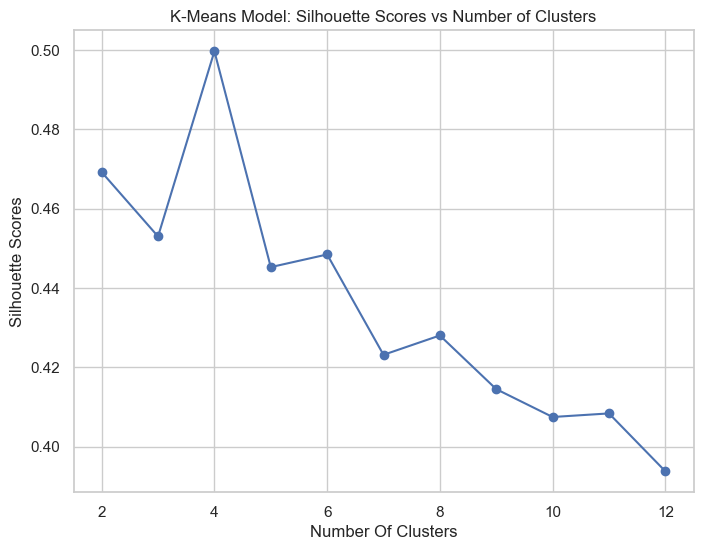

In [107]:
#Create a line plot of silhouette scores vs n_clusters
x_values = list(range(2, 13))

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Set Seaborn style

# Create a line plot using Matplotlib
plt.plot(x_values, silhouette_scores, marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('K-Means Model: Silhouette Scores vs Number of Clusters')
plt.xlabel('Number Of Clusters')
plt.ylabel('Silhouette Scores')

# Turn on grid and show plot
plt.grid(True)
plt.show()

In [108]:
#finally the best no of cluster is 4

In [109]:
final_model = KMeans(n_clusters=5, random_state=42, n_init=10)
final_model.fit(X)  # Fit the KMeans model to your data


E:\annoconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, n_init=10, random_state=42)

In [110]:
labels = final_model.labels_  # Accessing the labels assigned by the KMeans algorithm
centroids = final_model.cluster_centers_  # Accessing the coordinates of the cluster centroids

print("Labels of the first 5 data points:")
print(labels[:5])  # Print labels of the first 5 data points
print()

print("Coordinates of the first 5 cluster centroids:")
print(centroids[:5])  # Print coordinates of the first 5 cluster centroids


Labels of the first 5 data points:
[2 0 3 0 2]

Coordinates of the first 5 cluster centroids:
[[30.1754386  82.35087719]
 [44.96969697 39.15151515]
 [25.775      50.775     ]
 [43.1        12.2       ]
 [60.36666667 51.16666667]]


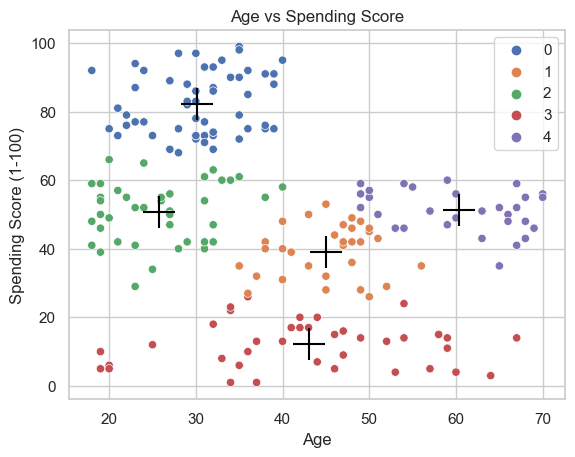

In [112]:
# Plot "Annual Income" vs "Spending Score" with final_model labels
sns.scatterplot(x=df['Age'], y=df['Spending Score (1-100)'], hue=labels, palette='deep')
plt.scatter(x=centroids[:, 0], y=centroids[:, 1], color='black', marker='+', s=500)
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("Age vs Spending Score")
plt.show()


In [131]:
X1 = df.iloc[:,[3,4]]
print(f"X Shape {X.shape}")
X1.head()

X Shape (200, 2)


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [138]:
xgb = X1.groupby(final_model.labels_).mean()

In [139]:
xgb


,Annual Income (k$),Spending Score (1-100)
0,66.070175,82.350877
1,58.666667,39.151515
2,52.875000,50.775000
3,67.475000,12.200000
4,53.200000,51.166667


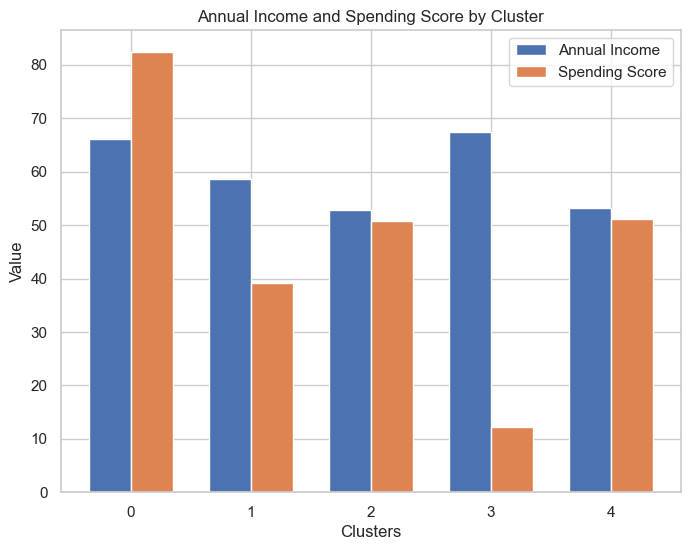

In [140]:
# Create side-by-side bar chart of `xgb`
plt.figure(figsize=(8, 6))

x = [0,1,2,3,4]
x_labels = labels
income_values = xgb['Annual Income (k$)']
spending_values = xgb['Spending Score (1-100)']

bar_width = 0.35
index = range(len(x))

# Create grouped bar plot using Matplotlib
plt.bar(index, income_values, bar_width, label='Annual Income')
plt.bar([i + bar_width for i in index], spending_values, bar_width, label='Spending Score')

# Add labels and title
plt.xlabel('Clusters')
plt.ylabel('Value')
plt.title('Annual Income and Spending Score by Cluster')
plt.xticks([i + bar_width / 2 for i in index], x)
plt.legend()

# Show plot
plt.show()